In [36]:
import tensorflow as tf
from keras.datasets import imdb 

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 50s 3us/step


In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 2s 1us/step


In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss ='binary_crossentropy',
              metrics = ['accuracy'])

In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1501 - acc: 0.9460 - val_loss: 0.1431 - val_acc: 0.9510
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1119 - acc: 0.9649 - val_loss: 0.1833 - val_acc: 0.9293
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0950 - acc: 0.9715 - val_loss: 0.1713 - val_acc: 0.9357
Epoch 4/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0768 - acc: 0.9789 - val_loss: 0.1890 - val_acc: 0.9285
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0635 - acc: 0.9829 - val_loss: 0.2107 - val_acc: 0.9214
Epoch 6/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0511 - acc: 0.9890 - val_loss: 0.2503 - val_acc: 0.9138
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.0405 - acc: 0.9914 - val_loss: 0.2501 - 

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

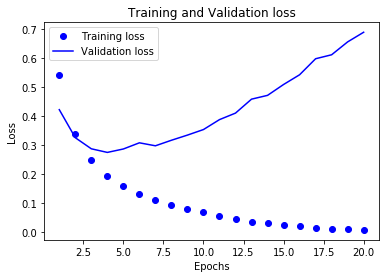

In [18]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [30]:
result = model.evaluate(x_test, y_test)
#model.predict(x_test)
result

25000/25000 [==============================] - 2s 75us/step


[1.1292957683444023, 0.8239200115203857]

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)


Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4608 - accuracy: 0.8281
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2656 - accuracy: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2071 - accuracy: 0.9260
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.1727 - accuracy: 0.9400


In [33]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 74us/step


[0.2875634324550629, 0.8861200213432312]

In [34]:
model.predict(x_test)

array([[0.21294439],
       [0.9993893 ],
       [0.8312713 ],
       ...,
       [0.11716482],
       [0.07656237],
       [0.6081293 ]], dtype=float32)